<a href="https://colab.research.google.com/github/meghnadh7/desktop-tutorial/blob/main/minor%20proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [5]:
df= pd.read_csv("cardio_trainm.csv")

In [105]:
df.describe

<bound method NDFrame.describe of           Id    Age  gender  Height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

     

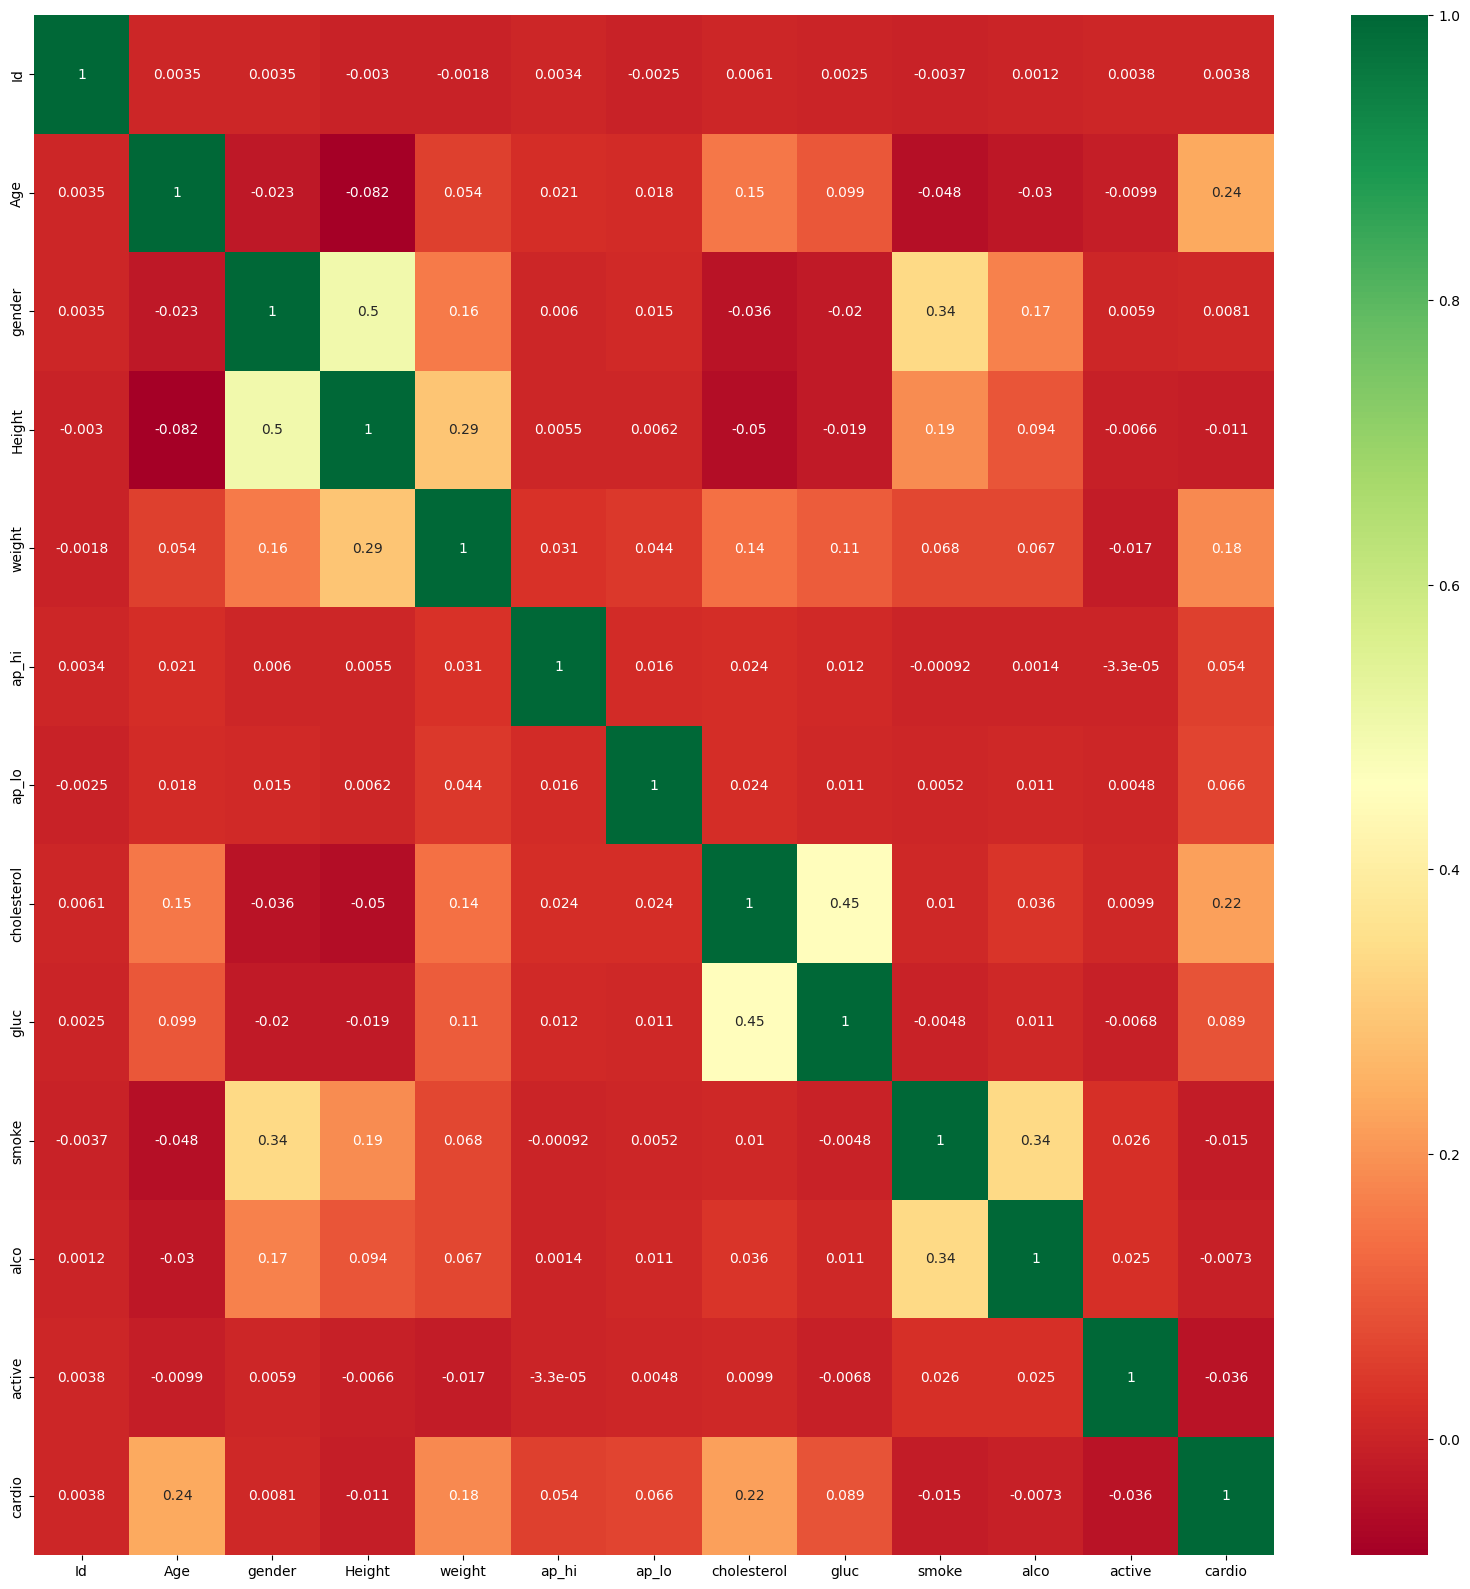

In [106]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

array([[<Axes: title={'center': 'Id'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'ap_hi'}>,
        <Axes: title={'center': 'ap_lo'}>,
        <Axes: title={'center': 'cholesterol'}>],
       [<Axes: title={'center': 'gluc'}>,
        <Axes: title={'center': 'smoke'}>,
        <Axes: title={'center': 'alco'}>,
        <Axes: title={'center': 'active'}>],
       [<Axes: title={'center': 'cardio'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

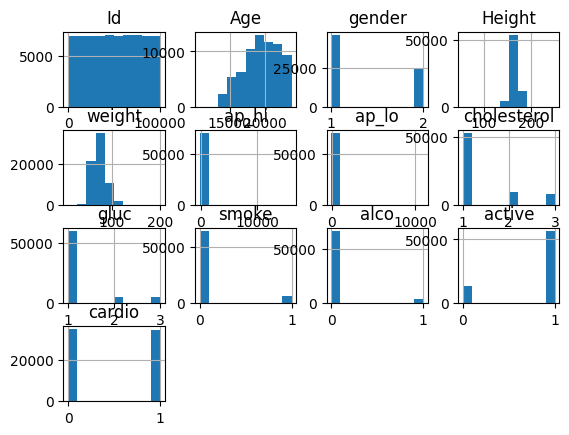

In [107]:
df.hist()

In [108]:
df.shape
df.head()

,Id,Age,gender,Height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [109]:
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

<Axes: xlabel='years', ylabel='count'>

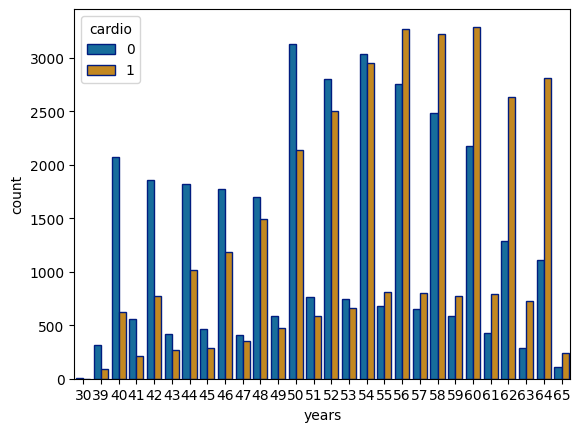

In [110]:
df['years'] = (df['Age']/365).round(0)
df['years'] = pd.to_numeric ( df['years'], downcast='integer')

sns.countplot(x='years', hue = 'cardio',data=df,palette='colorblind',edgecolor=sns.color_palette('dark', n_colors=1))

In [6]:
df.head()

,Id,Age,gender,Height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [8]:
# selecting x and y for processing
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [9]:
# splitting data

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 1)

In [10]:
scaler = StandardScaler()
x_train= scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [117]:
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 1)
forest.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1)

In [118]:
fmodel = forest
forest_score = fmodel.score(x_train, y_train)
print(forest_score)

0.7898857142857143


In [119]:
df = df.drop('years', axis = 1)

In [24]:
df.head()

,Id,Age,gender,Height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [20]:
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(x_train, y_train)


SVC(kernel='linear')

In [21]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = svm_model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
report = classification_report(y_test, y_pred)


In [22]:
accurracy = accuracy_score(y_test,y_pred)
report = classification_report(y_test, y_pred)

print(accurracy)

0.7234857142857143


In [11]:
# decision tree
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)


DecisionTreeClassifier()

In [12]:
y_pred = dt_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(accuracy)

0.6249142857142858


In [13]:
# logistic regression

logreg_model = LogisticRegression( max_iter = 100000,C=1.0, random_state = 1, multi_class='auto')

# Train the model on the training data
logreg_model.fit(x_train, y_train)


LogisticRegression(max_iter=100000, random_state=1)

In [14]:
y_pred = logreg_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(accuracy)

0.7194285714285714


In [15]:
lscore = logreg_model.score(x_train,y_train)
print(lscore)

0.7226857142857143


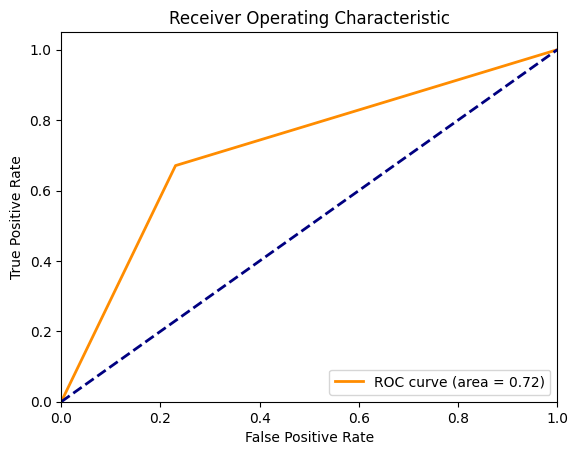

In [16]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [17]:
# k nearest neighbour (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)


KNeighborsClassifier()

In [18]:
y_pred = knn_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [19]:
print(accuracy)
print(report)

0.6247428571428572
              precision    recall  f1-score   support

           0       0.61      0.66      0.63      8609
           1       0.64      0.59      0.61      8891

    accuracy                           0.62     17500
   macro avg       0.63      0.63      0.62     17500
weighted avg       0.63      0.62      0.62     17500



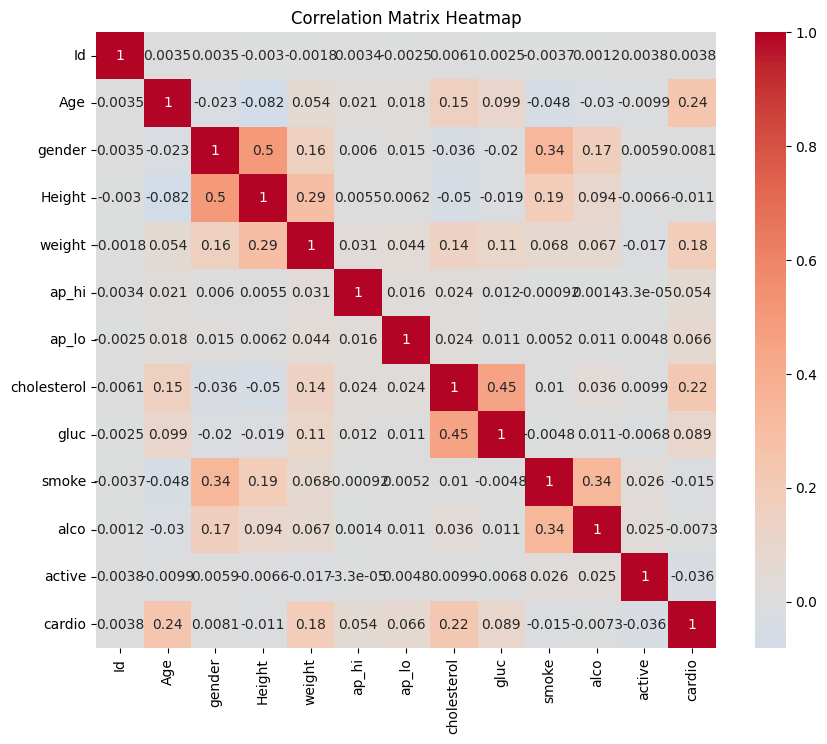

In [23]:
correlation_matrix = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()